# **Detectar divergências entre preço *vs* indicador automaticamente**

---

*Disclaimer:*

Este código foi elaborado para fins exclusivamente educacionais. O conteúdo aqui apresentado visa fornecer informações complementares para auxiliar o investidor na tomada de suas próprias decisões de investimento. Reforçando, nenhum tópico aqui abordado constitui qualquer tipo de indicação de compra/venda de qualquer ativo financeiro.

---

## 1. Contexto:

Para explorarmos o código, precisamos entender dois conceitos básicos: **divergência** e **autocorrelação**

### Divergências:

As divergências são sinais importantes na análise técnica de ativos financeiros. De forma simples, elas são definidas quando o preço do ativo e um indicador (por ex., IFR) estão se movendo em direções opostas. Muitos analistas utilizam as essas divergências para prever possíveis reversões de tendência, ou até mesmo como alerta para encurtar os stops pois a tendência atual se enfraqueceu.

As divergências são normalmente classificadas em Divergência de Alta (Bullish Divergence) e Divergência de Baixa (Bearish Divergence). A primeira ocorre quando o preço do ativo forma fundos mais baixos (lower lows), mas o indicador forma fundos mais altos (higher lows). Isso sugere que, apesar do preço estar caindo, a força de venda está diminuindo, indicando uma possível reversão para uma tendência de alta. Nas Divergências de Baixa, o preço do ativo forma topos mais altos (higher highs), mas o indicador forma topos mais baixos (lower highs), sugerindo uma possível reversão para uma tendência de baixa.

Para mais detalhes sobre o que são divergências, acesse o link: https://www.investopedia.com/terms/d/divergence.asp

Na figura, temos uma divergência de baixa (“bearish”) do indicador IFR (também conhecido por RSI). Observe que os preços estão subindo nos candles indicados (marcando topos mais altos), ao mesmo tempo em que o indicador IFR tem feito topos mais baixos.

A divergência no IFR anterior sugere que a compra no rompimento dos topos dos preço poderia ser uma "armadilha" já que não foram confirmadas pelo indicador. Para alguns, instigaria até uma venda quando rompesse o último fundo (que curiosamente teria sido bem lucrativa!!) 

### Autocorrelação:

Para reduzir vieses pessoais e utilizar as divergências em múltiplos ativos e timeframes, é importante que a detecção das divergências, seja feita de forma automatizada, segundo uma metodologia lógica e replicável.

A Autocorrelação é uma medida estatística que avalia a similaridade entre uma série temporal e uma versão defasada dela mesma. Ela é usada para identificar padrões que se repetem nos dados ao longo do tempo. Para isso, precisamos definir o tempo de defasagem (lag time) que indicará a correlação entre os últimos dados. Por exemplo, considerando um lag de 1, será feita a correlação entre a série de dados do dia com seu respectivo dia anterior. Se ela for significativamente positiva, temos que o preço hoje está se movendo na mesma direção do preço de ontem.

Dessa forma, podemos checar se durante um determinado período os preços estão caminhando na mesma direção. Veja no exemplo a seguir:

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import mplfinance as mpf

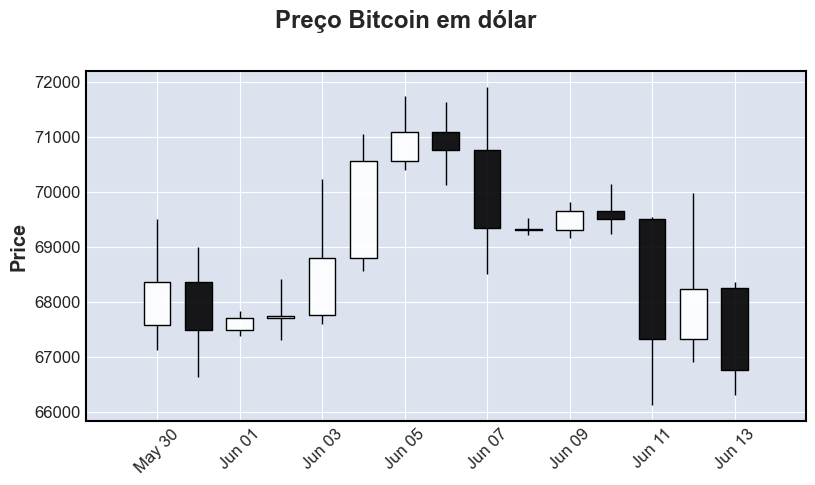

In [2]:
ticker = 'BTC-USD'
df_stock = yf.download(ticker, start='2024-05-30', end='2024-06-14', progress=False).round(decimals=2)
mpf.plot(df_stock, type='candle',  title="Preço Bitcoin em dólar", figsize=(10,5))

Vamos calcular a autocorrelação com lag 1 para janelas de preço de 5 dias

In [3]:
df_stock['Autocorr_preco'] = df_stock.Close.rolling(5).apply(lambda x: x.autocorr(lag=1)).round(decimals=2)
df_stock

,Open,High,Low,Close,Adj Close,Volume,Autocorr_preco
Date,,,,,,,
2024-05-30,67576.09,69500.54,67118.08,68364.99,68364.99,29509712534,NaN
2024-05-31,68362.52,68999.56,66633.42,67491.41,67491.41,27387283769,NaN
2024-06-01,67489.61,67839.77,67386.20,67706.94,67706.94,11641495604,NaN
2024-06-02,67710.27,68409.16,67315.52,67751.60,67751.60,17110588415,NaN
2024-06-03,67753.90,70230.82,67589.84,68804.78,68804.78,32401285324,-0.31
2024-06-04,68804.57,71047.41,68564.64,70567.77,70567.77,33149696545,0.96
2024-06-05,70568.35,71735.41,70390.71,71082.82,71082.82,32810771409,0.88
2024-06-06,71082.84,71625.73,70119.12,70757.16,70757.16,25223152007,0.84
2024-06-07,70759.19,71907.85,68507.26,69342.59,69342.59,36188381096,-0.12


Observe na coluna criado que no dia 04/06/2024, o preço de fechamento apresenta a maior autocorrelação (0.96) na janela de 5 dias. Dessa forma, os últimos 5 dias estão andando em uma direção similar (tendência de alta)

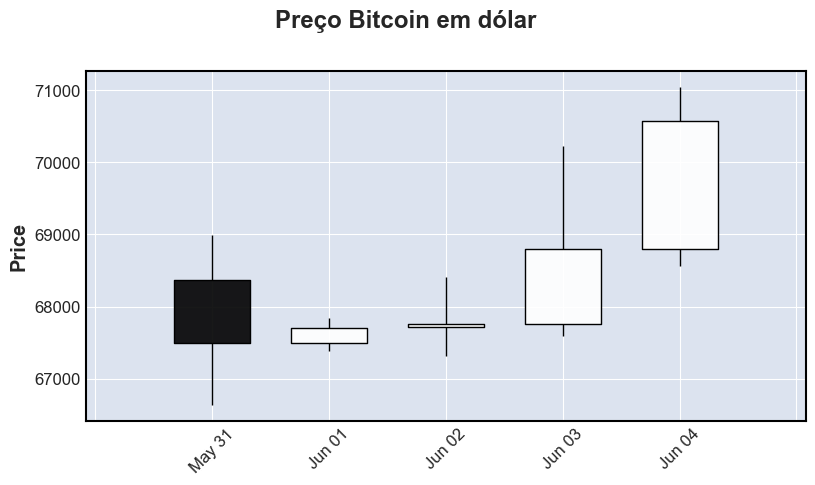

In [4]:
mpf.plot(df_stock.loc['2024-05-31' : '2024-06-04'], type='candle',  title="Preço Bitcoin em dólar", figsize=(10,5))

Já no dia 07/06/2024, o preço de fechamento apresenta baixa autocorrelação (-0.12) na janela de 5 dias. Dessa forma, nos últimos 5 dias os preços não apresentam maior lateralização.

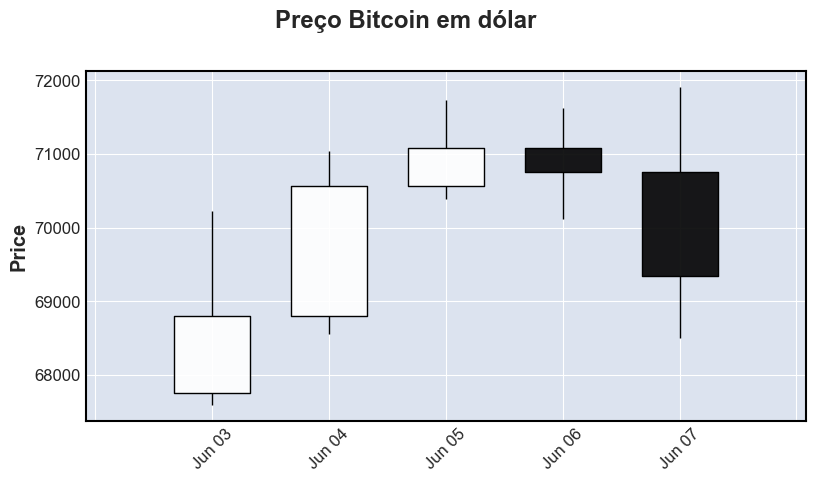

In [5]:
mpf.plot(df_stock.loc['2024-06-03' : '2024-06-07'], type='candle',  title="Preço Bitcoin em dólar", figsize=(10,5))

## 2. Funções para detecção de divergências

Nessa exemplo vamos usar a divergência dos preços com o indicador IFR (RSI, relativa strength index). Para conhecer mais sobre a fórmula, acesse https://www.investopedia.com/terms/r/rsi.asp

Função rsi:

1. Define a função que aceita dois argumentos: data_series (uma série pandas contendo os dados de preços) e window (um número inteiro representando o período sobre o qual o RSI é calculado, com o valor padrão de 14);
2. Calcula a diferença entre os preços de fechamento consecutivos. data_series.diff() retorna uma série onde cada valor é a diferença entre o valor atual e o valor anterior em data_series;
3. Faz um "clip" nos valores de close_diff de modo que todas as diferenças negativas sejam ajustadas para 0. Isso captura apenas as variações positivas de preço (ganhos).
4. Faz um "clip" nos valores de close_diff de modo que todas as diferenças positivas sejam ajustadas para 0 e, em seguida, multiplica por -1 para converter os valores negativos em positivos. Isso captura apenas as variações negativas de preço (perdas).
5. Calcula a média móvel exponencial (EWMA) dos up_values sobre o período especificado. alpha=1/window define o fator de suavização, e min_periods=window garante que pelo menos window observações sejam usadas para calcular a EWMA.
6. Calcula a EWMA dos down_values sobre o período especificado usando os mesmos parâmetros;
7. Calcula a Força Relativa (RS) dividindo a EWMA dos ganhos (up_ewm) pela EWMA das perdas (down_ewm)
8. Converte a Força Relativa (RS) para o Índice de Força Relativa (RSI) usando a fórmula RSI = 100 - (100 / (1 + RS))
9. Define o nome da série resultante do RSI como "rsi";
10. Retorna a série calculada do RSI.

In [6]:
def rsi(data_series, window=14):

    close_diff = data_series.diff()
    up_values = close_diff.clip(lower=0)
    down_values = close_diff.clip(upper=0) * (-1)
    up_ewm = up_values.ewm(alpha=1 / window, min_periods=window).mean()
    down_ewm = down_values.ewm(alpha=1 / window, min_periods=window).mean()

    rs_ewm = up_ewm / down_ewm
    rsi = 100 - (100 / (1 + rs_ewm))

    rsi.name = "rsi"

    return rsi

Função localizar_divergencias

1. Define a função que aceita quatro argumentos: price_series (uma série pandas contendo os preços), indicator (uma série pandas contendo os valores do indicador), window (um número inteiro que representa o período da janela de cálculo) e filtro (um valor de filtro para a autocorrelação);
2. Calcula a autocorrelação dos preços utilizando uma janela deslizante de tamanho "window". A função apply aplica a função autocorr em cada janela na série price_series;
3. Calcula a autocorrelação dos valores do indicador utilizando uma janela deslizante de tamanho "window", de forma similar à linha anterior;
4. Cria um sinal para os preços baseando-se na comparação entre o preço atual e o preço de window-1 períodos atrás. Se o preço atual for maior, o sinal é 'tendencia_alta' nos preços; caso contrário, é 'tendencia_baixa';
5. Cria um sinal para o indicador utilizando a mesma lógica da linha anterior, mas aplicando-a aos valores do indicador;
6. Define a condição para um sinal de alta (bullish). Isso ocorre quando: a) a autocorrelação dos preços é maior que o filtro pré-determinado e o preço está em 'tendencia_baixa', b) o sinal do indicador indica 'tendencia_alta';
7. Define a condição para um sinal de baixa (bearish). Isso ocorre quando: a) a autocorrelação dos preços é maior que o filtro pré-determinado e o preço está em 'tendencia_alta', b) o sinal do indicador indica 'tendencia_baixa';
8. Retorna os sinais de alta (bullish) e baixa (bearish) como bool (True or False).

In [7]:
def localizar_divergencias(price_series, indicator, window, filtro):

    autocorr_price = price_series.rolling(window).apply(lambda x: x.autocorr())
    autocorr_indicator = price_series.rolling(window).apply(lambda x: x.autocorr())

    autocorr_price_signal = np.where(price_series > price_series.shift(window-1), 'tendencia_alta', 'tendencia_baixa')
    autocorr_indicator_signal = np.where(indicator > indicator.shift(window-1), 'tendencia_alta', 'tendencia_baixa')

    signal_bullish = (autocorr_price>filtro) & (autocorr_price_signal=='tendencia_baixa') & \
                        (autocorr_indicator>filtro) & (autocorr_indicator_signal=='tendencia_alta')

    signal_bearish = (autocorr_price>filtro) & (autocorr_price_signal=='tendencia_alta') & \
                    (autocorr_indicator>filtro) & (autocorr_indicator_signal=='tendencia_baixa')

    return signal_bullish, signal_bearish

## 3. Localizar e plotar as divergências

Vamos baixar os dados do Bitcoin (em dólar) nos últimos 2 anos (14/07/2022 a 14/07/2024)

In [8]:
ticker = 'BTC-USD'
df_stock = yf.download(ticker, start='2022-07-14', end='2024-07-14', progress=False).round(decimals=2)

Calcular o IFR de 14 períodos e remover os 13 primeiros NA

In [9]:
df_stock['IFR'] = rsi(df_stock.Close, window=14)
df_stock = df_stock.dropna()

Agora basta definir o tamanho de sua janela a ser analisada e o filtro da autocorrelação desejada. O ideal é utilizar a janela com o mesmo valor do cálculo do indicador (neste exemplo, IFR de 14 períodos). Por exemplo, se usa IFR de 20 períodos, basta alterar o parâmetro nas duas funções acima.

Também pode personalizar o filtro, lembrando que ele vai de -1 a 1. Filtros mais próximos de 1 serão mais restritivos, com menos sinais de divergências (porém mais fortes).

In [10]:
janela = 14
filtro = 0.7

df_stock.loc[:, 'signal_bullish'], df_stock.loc[:, 'signal_bearish'] = localizar_divergencias(df_stock['Close'], df_stock['IFR'], janela, filtro)

Vamos filtrar todas as divergências encontradas, para bullish e bearish

In [11]:
df_stock[df_stock.signal_bullish==True]

,Open,High,Low,Close,Adj Close,Volume,IFR,signal_bullish,signal_bearish
Date,,,,,,,,,
2022-09-01,20050.50,20198.39,19653.97,20127.14,20127.14,30182031010,37.139553,True,False
2022-09-02,20126.07,20401.57,19814.77,19969.77,19969.77,29123998928,36.072092,True,False
2024-05-04,62891.03,64494.96,62599.35,63891.47,63891.47,20620477992,49.764507,True,False
2024-07-01,62673.61,63777.23,62495.51,62851.98,62851.98,25468379421,44.360392,True,False
2024-07-07,58239.43,58371.12,55793.32,55849.11,55849.11,20553359505,30.634337,True,False
2024-07-09,56704.60,58239.20,56316.88,58009.23,58009.23,27849512607,39.235523,True,False
2024-07-10,58033.88,59359.43,57178.41,57742.50,57742.50,26175260526,38.580836,True,False
2024-07-11,57729.89,59299.43,57120.38,57344.91,57344.91,28707803842,37.574380,True,False
2024-07-12,57341.20,58532.55,56590.18,57899.46,57899.46,25604805221,39.928255,True,False


In [12]:
df_stock[df_stock.signal_bearish==True]

,Open,High,Low,Close,Adj Close,Volume,IFR,signal_bullish,signal_bearish
Date,,,,,,,,,
2023-01-26,23108.96,23237.08,22911.37,23032.78,23032.78,26357839322,80.862941,False,True
2023-01-27,23030.72,23417.72,22654.59,23078.73,23078.73,25383335641,81.063382,False,True
2023-01-28,23079.96,23165.90,22908.85,23031.09,23031.09,14712928379,80.126344,False,True
2023-01-29,23031.45,23919.89,22985.07,23774.57,23774.57,27423687259,83.359214,False,True
2023-01-30,23774.65,23789.35,22657.58,22840.14,22840.14,27205595568,68.317293,False,True
2023-01-31,22840.80,23225.02,22765.57,23139.28,23139.28,22837828665,70.172848,False,True
2023-03-27,27994.07,28037.93,26606.69,27139.89,27139.89,18188895178,59.025174,False,True
2023-04-17,30317.15,30319.20,29275.37,29445.04,29445.04,17872186762,59.223667,False,True
2023-04-19,30394.19,30411.05,28669.90,28822.68,28822.68,24571565421,51.475327,False,True


Agora você pode plotar cada divergência alterando o índice (index_n). Ele representa cada data onde foi confirmada uma divergência

In [13]:
# Plotando a primeira divergência ('2022-09-01')

index_n = 0

data_fim = df_stock[df_stock.signal_bullish==True].index[0]
data_inicio = data_fim - timedelta(days=janela-1)
dados_fig = df_stock[df_stock.index.isin(pd.date_range(str(data_inicio), str(data_fim)))]

fig_01 = make_subplots(rows=2, cols=1)

# Candlesticks

fig_01.add_trace(go.Candlestick(name='BTC-USD',x=dados_fig.index, \
    close=dados_fig['Close'], open=dados_fig['Open'], high=dados_fig['High'], \
    low=dados_fig['Low'], increasing_line_color= 'green', \
    decreasing_line_color= 'red'), row=1,col=1)

# IFR

fig_01.add_trace(go.Scatter(name='IFR 14p',x=dados_fig.index, \
    y=dados_fig['IFR'], marker_color='orange'), row=2, col=1)

fig_01.update_layout(xaxis_rangeslider_visible=False, title='<b>Divergência IFR',
    xaxis2_title="<b>Data", yaxis1_title="<b>Preço Bitcoin (USD)", \
    yaxis2_title="<b>IFR", legend_title="", legend=dict(orientation="h", \
    yanchor="top", y=1.05,xanchor="right",x=0.975),
    font=dict(family="Arial, Arial, Arial",size=15,color="black"),
    margin=dict(l=50, r=20, t=70, b=20), template = 'simple_white', 
    paper_bgcolor="#f7f8fa", width=800,height=800).show()

In [14]:
index_n = 0

data_fim = df_stock[df_stock.signal_bearish==True].index[0]
data_inicio = data_fim - timedelta(days=janela-1)
dados_fig = df_stock[df_stock.index.isin(pd.date_range(str(data_inicio), str(data_fim)))]

fig_01 = make_subplots(rows=2, cols=1)

# Candlesticks

fig_01.add_trace(go.Candlestick(name='BTC-USD',x=dados_fig.index, \
    close=dados_fig['Close'], open=dados_fig['Open'], high=dados_fig['High'], \
    low=dados_fig['Low'], increasing_line_color= 'green', \
    decreasing_line_color= 'red'), row=1,col=1)

# IFR

fig_01.add_trace(go.Scatter(name='IFR 14p',x=dados_fig.index, \
    y=dados_fig['IFR'], marker_color='orange'), row=2, col=1)

fig_01.update_layout(xaxis_rangeslider_visible=False, title='<b>Divergência IFR',
    xaxis2_title="<b>Data", yaxis1_title="<b>Preço Bitcoin (USD)", \
    yaxis2_title="<b>IFR", legend_title="", legend=dict(orientation="h", \
    yanchor="top", y=1.05,xanchor="right",x=0.975),
    font=dict(family="Arial, Arial, Arial",size=15,color="black"),
    margin=dict(l=50, r=20, t=70, b=20), template = 'simple_white', 
    paper_bgcolor="#f7f8fa", width=800,height=800).show()

## 5. Código para a primeira figura (seção "Contexto") onde exemplifico uma divergência

In [17]:
btc_ohlc = yf.download('BTC-USD', start='2022-06-15', end='2022-09-07', progress=False)
btc_ohlc['IFR'] = rsi(btc_ohlc.Close, window=14)
btc_ohlc = btc_ohlc.dropna()

dados_fig = btc_ohlc

fig_01 = make_subplots(rows=2, cols=1)

# Candlesticks

fig_01.add_trace(go.Candlestick(name='BTC-USD',x=dados_fig.index, close=dados_fig['Close'], 
                            open=dados_fig['Open'], high=dados_fig['High'], 
                            low=dados_fig['Low'], increasing_line_color= 'green',
                            decreasing_line_color= 'red'), row=1,col=1)

fig_01.add_annotation(x='2022-07-20',y=24195, ax='2022-07-20',ay=25695, xref="x1",yref="y1", axref="x1",ayref="y1",
                        text="<b>Topo 1", showarrow=True, font=dict(family="Arial",size=12,color="black"),
                        align="center",arrowhead=2, arrowsize=1,arrowwidth=2,arrowcolor="black", row=1,col=1)

fig_01.add_hline(y=24196.8, line_dash="dot", row=1, col=1, line_color="#000000", line_width=2)

fig_01.add_annotation(x='2022-07-30',y=24600, ax='2022-07-30',ay=26100, xref="x1",yref="y1", axref="x1",ayref="y1",
                        text="<b>Topo 2", showarrow=True, font=dict(family="Arial",size=12,color="black"),
                        align="center",arrowhead=2, arrowsize=1,arrowwidth=2,arrowcolor="black", row=1,col=1)

fig_01.add_hline(y=24572.6, line_dash="dot", row=1, col=1, line_color="#000000", line_width=2)

fig_01.add_annotation(x='2022-08-15',y=25135, ax='2022-08-15',ay=26635, xref="x1",yref="y1", axref="x1",ayref="y1",
                        text="<b>Topo 3", showarrow=True, font=dict(family="Arial",size=12,color="black"),
                        align="center",arrowhead=2, arrowsize=1,arrowwidth=2,arrowcolor="black", row=1,col=1)

fig_01.add_hline(y=25135.9, line_dash="dot", row=1, col=1, line_color="#000000", line_width=2)

# IFR

fig_01.add_trace(go.Scatter(name='IFR 14p',x=dados_fig.index, y=dados_fig['IFR'], marker_color='orange'), row=2, col=1)

fig_01.add_annotation(x='2022-07-20',y=64.87, ax='2022-07-20',ay=74.87, xref="x2",yref="y2", axref="x2",ayref="y2",
                        text="<b>Topo 1", showarrow=True, font=dict(family="Arial",size=12,color="black"),
                        align="center",arrowhead=2, arrowsize=1,arrowwidth=2,arrowcolor="black", row=2,col=1)

fig_01.add_annotation(x='2022-07-30',y=61.70, ax='2022-07-30',ay=71.70, xref="x2",yref="y2", axref="x2",ayref="y2",
                        text="<b>Topo 2", showarrow=True, font=dict(family="Arial",size=12,color="black"),
                        align="center",arrowhead=2, arrowsize=1,arrowwidth=2,arrowcolor="black", row=2,col=1)

fig_01.add_annotation(x='2022-08-15',y=59.60, ax='2022-08-15',ay=69.60, xref="x2",yref="y2", axref="x2",ayref="y2",
                        text="<b>Topo 3", showarrow=True, font=dict(family="Arial",size=12,color="black"),
                        align="center",arrowhead=2, arrowsize=1,arrowwidth=2,arrowcolor="black", row=2,col=1)

fig_01.update_layout(xaxis_rangeslider_visible=False, title='<b>Divergência IFR',
                    xaxis2_title="<b>Data", yaxis1_title="<b>Preço Bitcoin (USD)", yaxis2_title="<b>IFR",
                    yaxis1=dict(range=['18000', '28000']), yaxis2=dict(range=['25', '80']),
                    legend_title="", legend=dict(orientation="h",yanchor="top", y=1.05,xanchor="right",x=0.975), 
                    font=dict(family="Arial, Arial, Arial",size=15,color="black"),
                    margin=dict(l=50, r=20, t=70, b=20), template = 'simple_white', 
                    paper_bgcolor="#f7f8fa", width=800,height=800).show()